In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from bokeh.io import show, output_notebook

def money(x, pos):
    return "${:,.0f}".format(x)

formatter = FuncFormatter(money)
index = ['sales', 'returns', 'credit fees', 'rebates', 'late charges', 'shipping']
data = {'amount': [350000, -30000, -7500, -25000, 95000, -7000]}

trans = pd.DataFrame(data=data, index=index)
blank = trans.amount.cumsum().shift(1).fillna(0)
trans.head()
#blank.head()

,amount
sales,350000
returns,-30000
credit fees,-7500
rebates,-25000
late charges,95000


In [115]:
blank.head()

sales                0.0
returns         350000.0
credit fees     320000.0
rebates         312500.0
late charges    287500.0
Name: amount, dtype: float64

751000
[     0.      0. 350000. 350000. 350000. 320000. 320000. 320000. 312500.
 312500. 312500. 287500. 287500. 287500. 382500. 382500. 382500. 751000.
 751000. 751000.     nan] Int64Index([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6], dtype='int64')
nan


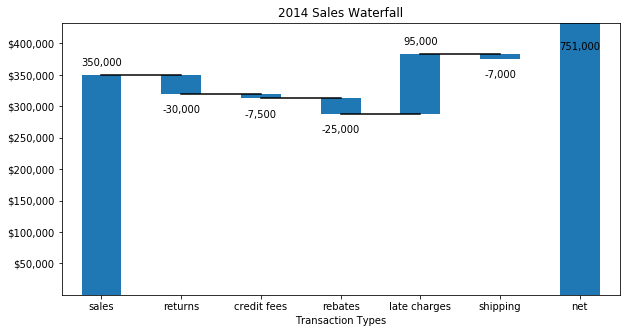

In [117]:
total = trans.sum().amount
trans.loc["net"] = total
blank.loc["net"] = total
print(total)

step = blank.reset_index(drop=True).repeat(3).shift(-1)
print(step.values, step.index)
print(np.nan)
step[1::3] = np.nan

blank.loc["net"] = 0

my_plot = trans.plot(kind='bar', stacked=True, bottom=blank, legend=None, figsize=(10, 5), title="2014 Sales Waterfall")
my_plot.plot(step.index, step.values, 'k')
my_plot.set_xlabel("Transaction Types")

my_plot.yaxis.set_major_formatter(formatter)

y_height = trans.amount.cumsum().shift(1).fillna(0)

max = trans.max(0)
neg_offset = max/25
pos_offset = max/50
plot_offset = int(max/15)

loop = 0
for index, row in trans.iterrows():
    if row['amount'] == total:
        y = y_height[loop]
    else:
        y = y_height[loop] + row['amount']

    if row['amount'] > 0:
        y += pos_offset
    else:
        y -= neg_offset

    my_plot.annotate("{:,.0f}".format(row['amount']), (loop,y), ha="center")
    loop += 1

my_plot.set_ylim(0, blank.max()+int(plot_offset))
my_plot.set_xticklabels(trans.index, rotation=0)
my_plot.get_figure().savefig("waterfall.png", dpi=200, bbox_inches="tight")

In [118]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name = "20", orientation = "v",
    measure = ["relative", "relative", "total", "relative", "relative", "total"],
    x = ["Sales", "Consulting", "Net revenue", "Purchases", "Other expenses", "Profit before tax"],
    textposition = "outside",
    text = ["+60", "+80", "", "-40", "-20", "Total"],
    y = [60, 80, 0, -40, -20, 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
        title = "Profit and loss statement 2018",
        showlegend = True
)

fig.show()

ModuleNotFoundError: No module named 'plotly'